<a href="https://colab.research.google.com/github/Lucasabfernandez/proyecto_integrado_2.1/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: armae un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Define possible values for columns
materias = ['Matemática', 'Lengua', 'Historia', 'Geografía', 'Ciencias Naturales', 'Educación Física', 'Inglés', 'Artes', 'Música', 'Informática']
apellidos = ['Gonzalez', 'Rodriguez', 'Perez', 'Gomez', 'Lopez', 'Martinez', 'Sanchez', 'Ramirez', 'Torres', 'Flores']
nombres = ['Juan', 'Maria', 'Jose', 'Ana', 'Pedro', 'Sofia', 'Luis', 'Laura', 'Carlos', 'Martina']

# Create an empty list to store the data
data = []

# Generate 100 rows of random data
for i in range(100):
    apellido = random.choice(apellidos)
    nombre = random.choice(nombres)
    nro_dni = random.randint(10000000, 99999999)  # Simulate DNI numbers
    materia = random.choice(materias)
    nota1 = random.randint(1, 10)
    nota2 = random.randint(1, 10)
    nota3 = random.randint(1, 10)
    faltas = random.randint(0, 15)
    data.append([apellido, nombre, nro_dni, materia, nota1, nota2, nota3, faltas])

# Create the DataFrame
df = pd.DataFrame(data, columns=['Apellido', 'Nombre', 'Nro_DNI', 'Materia Escolar', 'Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre', 'Faltas a clases'])

# Print the first few rows of the DataFrame
print(df.head())

    Apellido   Nombre   Nro_DNI     Materia Escolar  Nota 1er Trimestre  \
0  Rodriguez     Luis  42507950  Ciencias Naturales                   2   
1    Sanchez  Martina  92132365           Geografía                   3   
2      Perez     Jose  16497289              Música                   1   
3     Torres    Laura  24692234           Geografía                   2   
4    Sanchez  Martina  26079882    Educación Física                   5   

   Nota 2do Trimestre  Nota 3er Trimestre  Faltas a clases  
0                   3                   6                6  
1                   3                   2                7  
2                   4                   5                0  
3                   4                  10                8  
4                   2                   9               14  


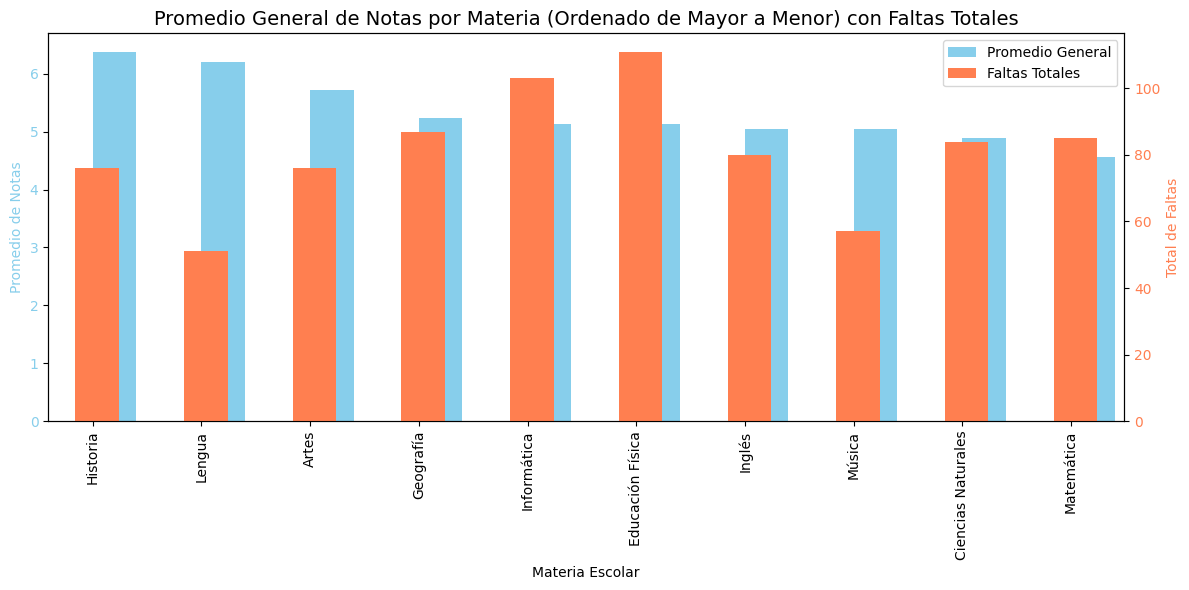

In [2]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt

# Calculate the average grade for each subject
average_grades = df.groupby('Materia Escolar')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)

# Sort subjects by average grade in descending order
average_grades_sorted = average_grades.sort_values(ascending=False)

# Calculate total absences for each subject
total_absences = df.groupby('Materia Escolar')['Faltas a clases'].sum()

# Create the bar plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot average grades
average_grades_sorted.plot(kind='bar', ax=ax1, color='skyblue', position=0, width=0.4, label='Promedio General')
ax1.set_ylabel('Promedio de Notas', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Create a secondary y-axis for absences
ax2 = ax1.twinx()

# Plot total absences
total_absences.loc[average_grades_sorted.index].plot(kind='bar', ax=ax2, color='coral', position=0.4, width=0.4, label='Faltas Totales')
ax2.set_ylabel('Total de Faltas', color='coral')
ax2.tick_params(axis='y', labelcolor='coral')


# Customize the plot
plt.title('Promedio General de Notas por Materia (Ordenado de Mayor a Menor) con Faltas Totales', fontsize=14)
plt.xlabel('Materia Escolar', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')


plt.show()

In [5]:
df.to_csv("datos_alumnos.csv", index=False)